#멜론 TOP30 노래 정보 시각화

## 1.패키지 설치 및 임포트

In [ ]:
!pip install koreanize.matplotlib

In [ ]:
import pandas as pd
from google.colab import files
from collections import Counter
import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import koreanize_matplotlib

## 2.데이터 전처리

In [ ]:
df = pd.read_csv('/content/sample_data/멜론 2020년 TOP30_20240710.csv')
df.head()

,노래제목,가수,가사
0,아무노래,지코 (ZICO),왜들 그리 다운돼있어뭐가 문제야 say something분위기가 겁나 싸해요새는 ...
1,METEOR,창모 (CHANGMO),Yeah haYeah haYeah haYeah haYeah haYeah haYea...
2,아로하,조정석,어두운 불빛아래 촛불 하나와인 잔에 담긴 약속하나항상 너의 곁에서 널 지켜줄거야날...
3,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,흔들리는 꽃들 속에서네 샴푸향이 느껴진거야스쳐지나간건가 뒤돌아보지만그냥 사람들만 ...
4,에잇(Prod.&Feat. SUGA of BTS),아이유,So are you happy nowFinally happy now are you...


In [ ]:
# 불용어 리스트
stopwords = ['은', '는', '이', '가', '으로', '에', '그', '어', 'a', 'the', 'an', 'i']

def remove_stopwords(words):
  return [word for word in words if word not in stopwords]

In [ ]:
# 가사에 단어 추출

# 1) 데이터 프레임 불러오기
df = pd.read_csv('/content/sample_data/멜론 2020년 TOP30_20240710.csv')

# 2) 가사 컬럼만 모두 하나의 문자열로 합치기
all_lyrics = ' '.join(df['가사'])

# 3) 단어 추출
# 가사 뭉치에서 단어를 추출하고, 단어의 빈도를 계산
# \b는 word boundary 단어의 시작과 끝에 있는 문자로 매칭
# \w는 word의 약자로 알파벳, 숫자, _ 문자를 찾기 [0-9Aa-Zzㄱ-ㅎ]
words = re.findall(r'\b\w+\b', all_lyrics.lower())

# 4) 불용어 처리
words = remove_stopwords(words)

## 3.단어의 빈도표 만들기

In [ ]:
# 단어의 빈도가 가장 높은 상위 20개 단어의 수를 추출
word_freq = Counter(words)
word_freq


top_words = [word for word, freq in word_freq.most_common(20)]
top_freqs = [freq for word, freq in word_freq.most_common(20)]

## 4.시각화

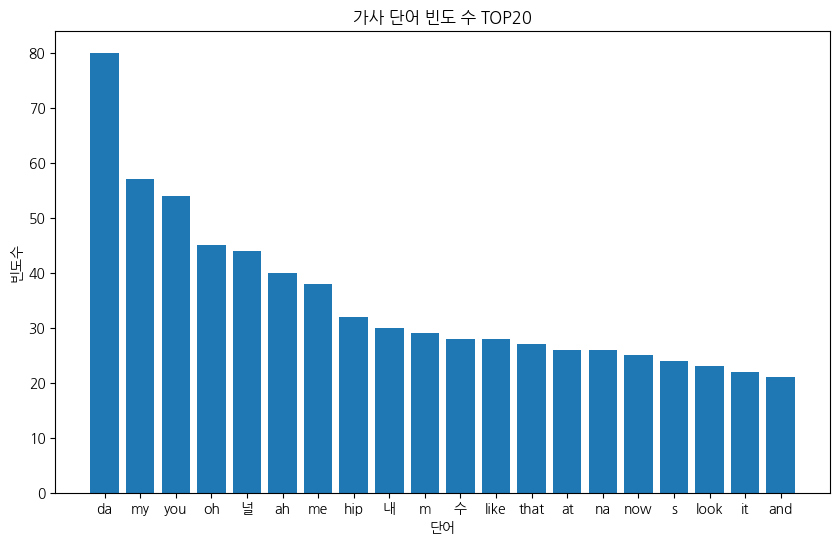

In [ ]:
# 막대그래프 시각화
plt.figure(figsize=(10,6))
plt.bar(top_words, top_freqs)
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title('가사 단어 빈도 수 TOP20')
plt.show()

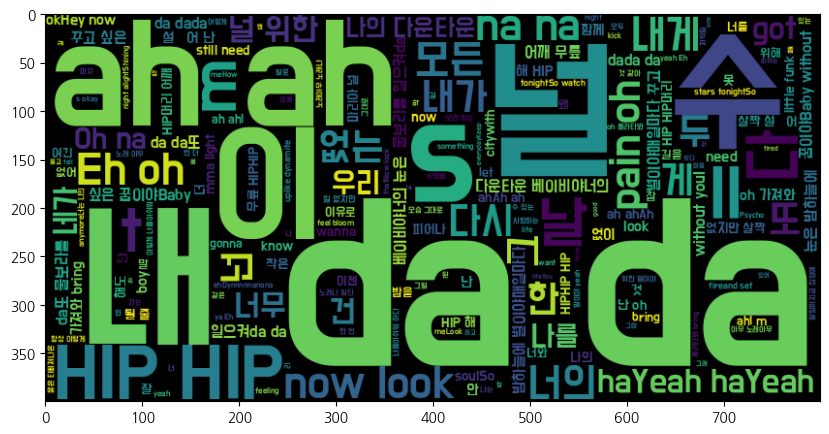

In [ ]:
# 워드 클라우드 시각화
wc = WordCloud(width=800, height=400, font_path='/content/sample_data/BMDOHYEON_ttf.ttf').generate(all_lyrics)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.show()